In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [2]:
from google.colab import files
uploaded = files.upload()

Saving anemia_dataset.csv to anemia_dataset.csv


In [3]:
df = pd.read_csv('anemia_dataset.csv')

# Display the first few rows of the DataFrame
df.head()


,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Number','Name'])

In [6]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_cleaned = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [8]:
df = df_cleaned

In [9]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No


# Data Summary

In [10]:
df

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No
...,...,...,...,...,...
99,49.9999,29.2860,20.7141,14.5,Yes
100,42.2324,30.6757,27.0919,6.3,Yes
101,45.6064,31.9084,22.4852,12.7,No
102,45.2095,29.2769,25.5136,13.4,No


In [11]:
df.describe()

,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000
mean,45.654175,28.875507,25.470325,12.150962
std,2.816294,1.554275,1.984671,2.512957
min,38.796800,25.140300,19.541300,2.800000
25%,43.911375,27.871300,24.896425,10.650000
50%,45.385350,28.948750,25.953200,12.600000
75%,46.968325,29.887275,26.721600,14.000000
max,54.647800,32.368100,29.841400,16.300000


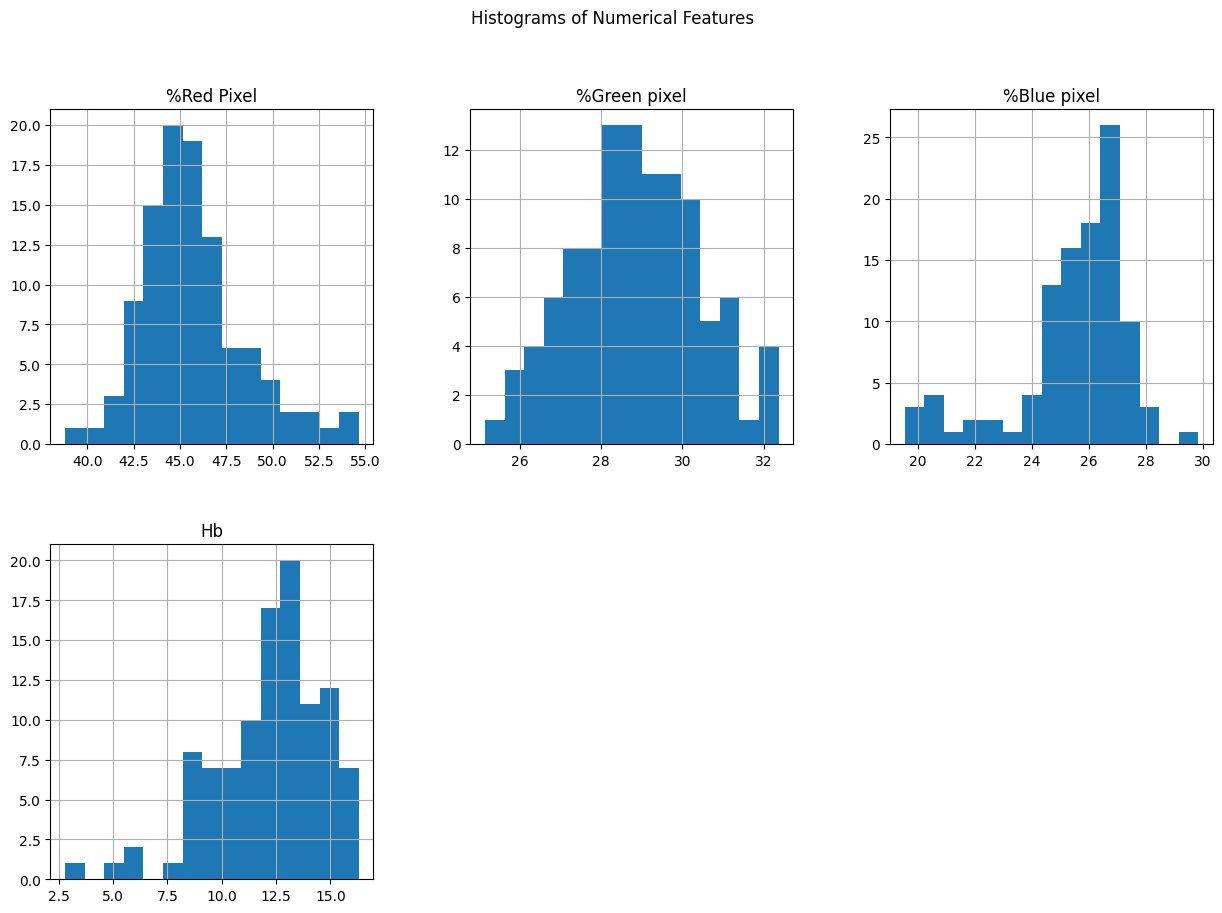

In [12]:
df.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Encoding the target variable

In [13]:
encoder = LabelEncoder()
df['Anaemic'] = encoder.fit_transform(df['Anaemic'])

In [14]:
df.head()

,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,1
1,45.6033,28.1900,26.2067,13.5,0
2,45.0107,28.9677,26.0215,11.7,0
3,44.5398,28.9899,26.4703,13.5,0
4,43.2870,30.6972,26.0158,12.4,0


# Splitting training and testing data

In [15]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['Anaemic']),df['Anaemic'],test_size=0.2,random_state=42)


In [16]:
x_train

,%Red Pixel,%Green pixel,%Blue pixel,Hb
55,46.2133,28.3358,25.4509,13.0
22,43.3019,29.8285,26.8697,12.1
76,49.5899,28.9754,21.4347,9.9
44,44.1868,28.9764,26.8368,14.1
72,52.9108,26.7881,20.3010,11.5
...,...,...,...,...
71,41.1330,32.3681,26.4989,10.0
14,46.9942,26.0496,26.9562,14.6
92,49.5037,26.7716,23.7246,14.5
51,44.0418,28.5164,27.4418,11.9


# **Logistic Regression**

In [17]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Logistic Regression performs well on the data with a accuracy score of 1.0

# **Decision Tree Classifier**

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred = dtc.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



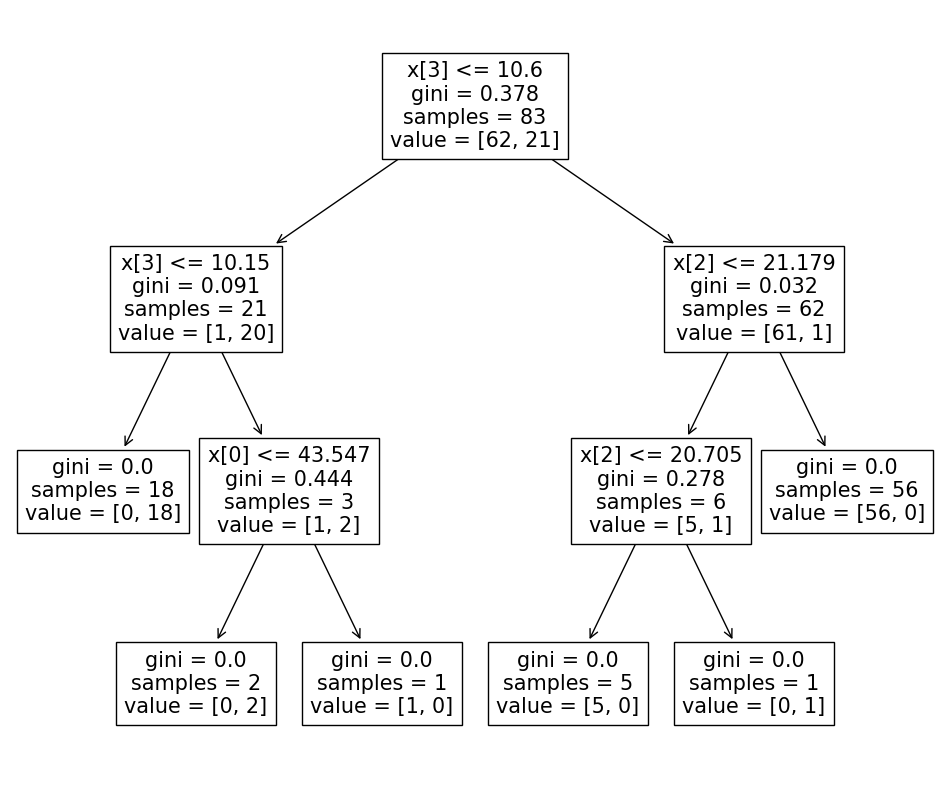

In [21]:
plt.figure(figsize=(12,10))
plot_tree(dtc)
plt.show()

# **Gradient Boosting Classifier**

In [22]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [23]:
y_pred = gbc.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[16  0]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# **Testing random data**

In [24]:
data = {
    '%Red Pixel': [10, 11, 12, 13, 14, 9, 10, 11, 12, 13],
    '%Green pixel': [44.2198, 46.3211, 43.9876, 45.6789, 44.5678, 42.1234, 43.4567, 44.8901, 45.2345, 46.0123],
    '%Blue pixel': [30.4567, 29.0123, 30.8901, 28.4567, 30.2345, 29.8765, 30.5678, 29.1234, 30.8901, 29.4567],
    'Hb': [12.6, 13.8, 11.5, 14.5, 12.1, 10.2, 11.9, 10.5, 11.2, 9.8],
    'Anaemic': ['No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

dt = pd.DataFrame(data)

print(dt)
encoder = LabelEncoder()
dt['Anaemic'] = encoder.fit_transform(dt['Anaemic'])

   %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0          10       44.2198      30.4567  12.6      No
1          11       46.3211      29.0123  13.8      No
2          12       43.9876      30.8901  11.5      No
3          13       45.6789      28.4567  14.5      No
4          14       44.5678      30.2345  12.1      No
5           9       42.1234      29.8765  10.2     Yes
6          10       43.4567      30.5678  11.9     Yes
7          11       44.8901      29.1234  10.5     Yes
8          12       45.2345      30.8901  11.2      No
9          13       46.0123      29.4567   9.8     Yes


In [25]:
y = dt['Anaemic']
X= dt.drop(columns=['Anaemic'])
y_dtc=dtc.predict(X)
y_gbc=gbc.predict(X)
y_lr=lr.predict(X)

In [26]:
print("Logistic Regression Accuracy:",accuracy_score(y,y_lr))
print("Decision Tree Accuracy:",accuracy_score(y,y_dtc))
print("Gradient Boosting Accuracy:",accuracy_score(y,y_gbc) )

Logistic Regression Accuracy: 0.4
Decision Tree Accuracy: 0.9
Gradient Boosting Accuracy: 0.9
